In [561]:
import numpy as np
import json
import urllib.request
import codecs
from konlpy.tag import Okt
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN
from nltk import word_tokenize

# 형태소 분석

In [602]:
def test_sop (infile, outfile):
    readFp = open(infile, "r", encoding="utf-8")
    wakati_file = outfile
    writeFp = open(wakati_file, "w", encoding="utf-8")

    # 형태소 분석
    twitter = Okt()
    i = 0

    while True:
        line = readFp.readline()
        if not line: break
            
        malist = twitter.pos(line, norm=True, stem=True)

        for word in malist:
            if word[1] in ["Noun"]:
                 writeFp.write(word[0] + " ")
    writeFp.close()

# Word 전처리

In [653]:
data_token = []

finance = codecs.open("finance.m", "r" , encoding="utf-8").read()
tokens_f = word_tokenize(finance)
for i, j in zip(tokens_f, range(30000)):
    data_token.append(i)
sports = codecs.open("sports.m", "r" , encoding="utf-8").read()
tokens_s = word_tokenize(sports)
for i, j in zip(tokens_s, range(30000)):
    data_token.append(i)
len(data_token)

60000

In [654]:
# data_token = np.array(data_token)

data_split = []
for i in range(600):
    data_split.append(data_token[i*100 : (i+1)*100])
len(data_split)

600

In [655]:
len_word = 100

In [656]:
from keras.preprocessing.text import Tokenizer

tokenizer.fit_on_texts(data_split)

sequences = tokenizer.texts_to_sequences(data_split)
# print("sequences",  sequences  )

In [657]:
#input_train = tokenizer.texts_to_matrix(data_token, mode='binary')
from keras.preprocessing import sequence

input_train = sequence.pad_sequences(sequences, maxlen=len_word)

In [658]:
input_train
print(input_train.shape)

(600, 100)


## labeling

In [659]:
y1 = [0] * 300
y2 = [1] * 300
y3 = y1 + y2
print(y3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [660]:
from keras.utils import np_utils

y_label = np.array(y3)
y_label = np_utils.to_categorical(y_label, 2, dtype = "float32")

print(y_label.shape)

(600, 2)


## Model

In [661]:
from keras.layers import Dense, LSTM, Embedding

max_features = 3000

model = Sequential()
model.add(Embedding(max_features, 100))
model.add(SimpleRNN(64))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

## Train

In [662]:
history = model.fit(input_train, y_label,
                   epochs = 10,
                   batch_size = 120,
                   validation_split = 0.2) 

Train on 480 samples, validate on 120 samples
Epoch 1/10
480/480 [==============================] - 8s 16ms/step - loss: 0.6663 - acc: 0.5979 - val_loss: 0.9246 - val_acc: 0.0083
Epoch 2/10
480/480 [==============================] - 0s 576us/step - loss: 0.4571 - acc: 0.8583 - val_loss: 0.8317 - val_acc: 0.3667
Epoch 3/10
480/480 [==============================] - 0s 535us/step - loss: 0.2474 - acc: 0.9896 - val_loss: 0.9124 - val_acc: 0.3500
Epoch 4/10
480/480 [==============================] - 0s 591us/step - loss: 0.1464 - acc: 0.9938 - val_loss: 0.6557 - val_acc: 0.6417
Epoch 5/10
480/480 [==============================] - 0s 492us/step - loss: 0.0661 - acc: 1.0000 - val_loss: 0.7191 - val_acc: 0.5667
Epoch 6/10
480/480 [==============================] - 0s 542us/step - loss: 0.0404 - acc: 1.0000 - val_loss: 0.6392 - val_acc: 0.6667
Epoch 7/10
480/480 [==============================] - 0s 488us/step - loss: 0.0289 - acc: 1.0000 - val_loss: 0.8361 - val_acc: 0.5083
Epoch 8/10
480/48

## Best param

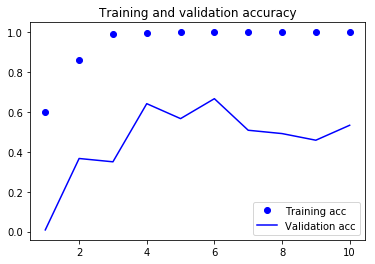

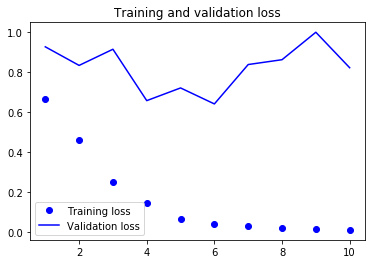

In [663]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Test

In [667]:
twitter = Okt()

test_data ="""정부가 한달 전부터 민간택지 아파트로도 분양가 상한제를 확대하겠다는 뜻을 밝혔는데요 세부안이 오늘 오전 발표됩 최근 반등세를 나타내고 있는 주택 시장이 어떤 반응을 보일지 주목됩니다. """
malist = twitter.pos(test_data, norm=True, stem=True)
test_data_list = []
for word in malist:
    if word[1] in ["Noun"]:
        test_data_list.append(word[0])
print(test_data_list)

['정부', '달', '전', '민간', '택지', '아파트', '도', '분양', '상한', '제', '확대', '뜻', '세부', '안이', '오늘', '오전', '발표', '최근', '등세', '주택', '시장', '반응', '주목']


In [665]:
twitter = Okt()

test_data ="""오늘 경기는 유벤투스의 승리로 승점 1점 더 챙기게 되었습니다 경기중 심판의 오판이 있던 판결에 대해 관중들은 크게 아쉬움을 표했습니다."""
malist = twitter.pos(test_data, norm=True, stem=True)
test_data_list = []
for word in malist:
    if word[1] in ["Noun"]:
        test_data_list.append(word[0])
print(test_data_list)

['오늘', '경기', '유벤투스', '승리', '승점', '점', '더', '경기', '심판', '판이', '판결', '대해', '관중', '크게', '아쉬움', '표']


In [668]:
data_token_test = []
for i in range(len(test_data_list)):
#     tokens = word_tokenize(test_data_list[i])
#     data_token_test.append(tokens)
    data_token_test.append(test_data_list[i])
data_token_test = np.array(data_token_test)

tokenizer.fit_on_texts(data_token_test)
sequences = tokenizer.texts_to_sequences(data_token_test)
test_data_sequence = sequence.pad_sequences(sequences, maxlen=len_word)

a = model.predict(test_data_sequence)
print(a)

[[0.17349909 0.8265009 ]
 [0.16455127 0.83544874]
 [0.16537188 0.83462805]
 [0.18022333 0.81977665]
 [0.18273449 0.8172655 ]
 [0.1892914  0.81070864]
 [0.17515075 0.82484925]
 [0.17824146 0.8217585 ]
 [0.17824903 0.82175094]
 [0.17892449 0.8210755 ]
 [0.19349663 0.8065034 ]
 [0.17400685 0.8259931 ]
 [0.17400685 0.8259931 ]
 [0.17400685 0.8259931 ]
 [0.18452916 0.8154708 ]
 [0.2102616  0.7897384 ]
 [0.16695292 0.83304715]
 [0.19712816 0.8028718 ]
 [0.17400685 0.8259931 ]
 [0.1909229  0.80907714]
 [0.20669155 0.7933084 ]
 [0.17400685 0.8259931 ]
 [0.20359547 0.79640454]]


In [650]:
# tokenizer = Tokenizer(num_words=len_word)
# tokenizer.fit_on_texts(data_split)

# sequences = tokenizer.texts_to_sequences(data_split)